In [ ]:
 !pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.6 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11135 sha256=1b923e040a0885c6f1f600c9909c43cd9accae14deab3c14a95ee9

In [ ]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geehydro

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for geehydro: filename=geehydro-0.2.0-py2.py3-none-any.whl size=10138 sha256=13f9f230939d93e8743259988e4c0b0ff51a94c30ee9fefde17aca10a9b2660c
  Stored in directory: /root/.cache/pip/wheels/ff/aa/13/b6c5b687208b545f735833f12891f3154c76fb63f2cdd9f192
Successfully built geehydro


In [ ]:
import ee, datetime
import pandas as pd
import numpy as np
import folium
import geehydro
import datetime as dt
import IPython.display
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px

In [ ]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=iO27flUxNj1_tgXYMSNYjriR6yl69mw48fxGlKMltjY&tc=eV5d821Yp5-e5YhA_RJ_lr0u7roqf3c3UIBlOI-Vdxc&cc=-Sy8RP-suWvCOJQvu_ljEwn-FjE8jQxpmJZPBD4RLjM

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AVHEtk5U8JgX1qbdhbo_pdjNeh-f8Y9boqMqHrx03cerkEiJbHW7a5uJs-Y

Successfully saved authorization token.


# **Selecting the AOI**

In [ ]:
katoria_map = folium.Map(location=[24.757152810164065,86.71201802016591 ], zoom_start=12)
katoria_map

**Selecting the Satellite**

In [ ]:
landsat = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR").\
          filter(ee.Filter.lt('CLOUD_COVER', 20)).\
          filterDate('2013-01-01','2023-01-01')
katoria_AOI = ee.Geometry.Polygon([
    [86.71201802016591,24.757152810164065],
[86.71111679793691,24.75407406036404],
[86.71111679793691,24.752632088024587],
[86.72060108901357,24.74892964998055],
[86.72266102553701,24.748695808085227],
[86.73042870284414,24.760465303861892],
[86.71115971328115,24.76557026824371],
[86.71201802016591,24.757152810164065]
])
landsat_AOI = landsat.filterBounds(katoria_AOI)


In [ ]:
print('Total number of images :', landsat_AOI.size().getInfo())

Total number of images : 97


**Plotting the first image of the image collection**

In [ ]:
listOfImages = landsat_AOI.toList(landsat_AOI.size())
palette = ['red', 'green', 'blue']
parameters = {'min': 0,
              'max': 1000,
              'dimensions': 512,
              'bands': ['B4', 'B3', 'B2'],
              'region': katoria_AOI}
katoria_map.addLayer(ee.Image(listOfImages.get(1)), parameters)
katoria_map

# **Landsat 8 Image Collection of NDVI**

**NDVI Analysis**

NDVI of every image pixels in the images will be calculated by the equation:
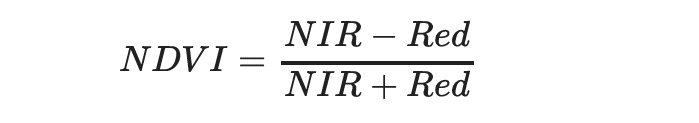

Where, NIR is B5 band and Red is B4 band. Average NDVI will be calculated on every images to get timeseries
NDVI of the AOI.

**NDVI Calcuation**

NDVI values for live plants range between 0 to 1, with 1 being the healthiest and 0 being the least healthy. A single value can be determined for every pixel in an image—ranging from an individual leaf to a 500-acre wheat field.

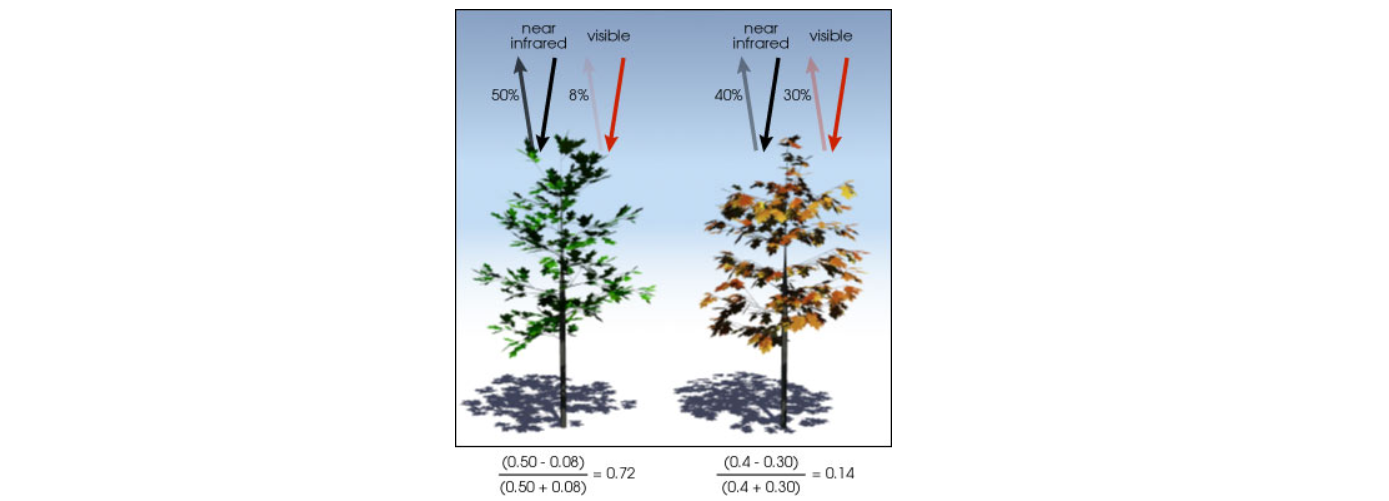

In [ ]:
#Function which calculates 'NDVI' and adding Bands to every image of image collection
def addNDVI(image):
  ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
  return image.addBands(ndvi)
with_ndvi = landsat_AOI.map(addNDVI)

In [ ]:
#Function which calculates the mean 'NDVI'
def meanNDVI(image):
  image = ee.Image(image)
  meanDict = image.reduceRegion(reducer=ee.Reducer.mean().setOutputs(['NDVI']),
                                 geometry = katoria_AOI,
                                 scale = image.projection().nominalScale().getInfo(),
                                 maxPixels = 10000,
                                 bestEffort = True);
  return meanDict.get('NDVI').getInfo()

In [ ]:
# Calculating the 'mean NDVI' for each image in the image collection
Images_ndvi = with_ndvi.select('NDVI').toList(with_ndvi.size())
ndvi_coll = []

for i in range(Images_ndvi.length().getInfo()):
  image = ee.Image(Images_ndvi.get(i-1))
  temp_ndvi = meanNDVI(image)
  ndvi_coll.append(temp_ndvi)

In [ ]:
# Extract 'dates' from the image collection
dates = np.array(with_ndvi.aggregate_array("system:time_start").getInfo())
day = [datetime.datetime.fromtimestamp(i/1000).strftime('%Y-%m-%d') for i in (dates)]

In [ ]:
#Creating a Timeseries Dataframe for the  NDVI
ndvi_df = pd.DataFrame(ndvi_coll, index = day, columns = ['ndvi'])
ndvi_df.index = pd.to_datetime(ndvi_df.index, format="%Y/%m/%d")
ndvi_df.sort_index(ascending = True, inplace = True)
ndvi_df

,ndvi
2013-04-10,0.272651
2013-04-17,0.238959
2013-05-03,0.239520
2013-09-24,0.237747
2013-11-11,0.600283
...,...
2021-04-23,0.270838
2021-11-01,0.294518
2021-11-17,0.637599
2021-12-03,0.546196


In [ ]:
# Up-sample the date column
ndvi_df_monthly = ndvi_df.resample('M').median()
# Linear interpolate NDVI data
ndvi_df_monthly.interpolate(method='polynomial', order = 1, inplace = True)
ndvi_df_monthly

,ndvi
2013-04-30,0.255805
2013-05-31,0.239520
2013-06-30,0.239084
2013-07-31,0.238633
2013-08-31,0.238183
...,...
2021-08-31,0.388089
2021-09-30,0.413793
2021-10-31,0.440354
2021-11-30,0.466059


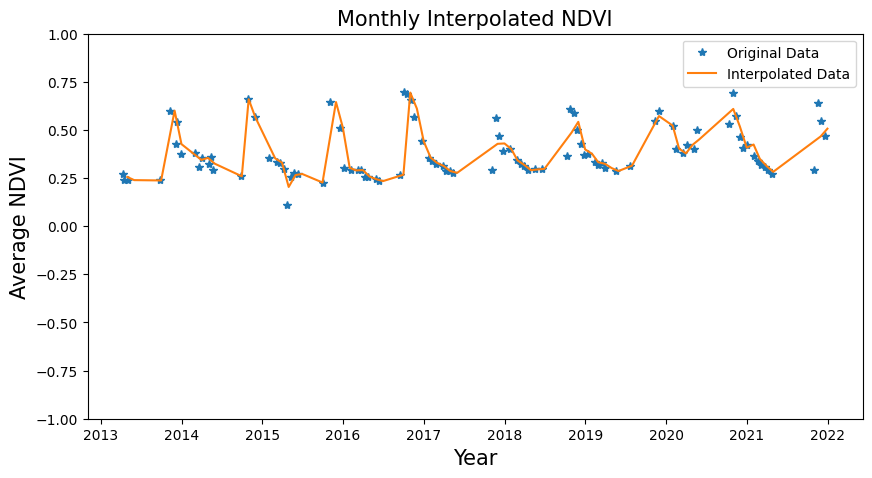

In [ ]:
#Plotting the interpolated Data
plt.figure(figsize=(10,5), dpi=100)
plt.plot(ndvi_df, '*')
plt.plot(ndvi_df_monthly)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average NDVI', fontsize=15)
plt.legend(['Original Data', 'Interpolated Data'])
plt.title("Monthly Interpolated NDVI", fontsize=15)
plt.ylim([-1, 1])
plt.show()

In [ ]:
ndvi_df.to_csv('ExtractedNDVI.csv')

In [ ]:
ndvi_df_monthly.to_csv("ExtractedNDVIMonthly.csv")

# **Data Analysis and Visualisation of Raw Data**

In [ ]:
df = pd.read_csv("/content/NDVIkatoria.csv",parse_dates=True)
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df['Year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['Month'] = pd.to_datetime(df['date']).dt.strftime('%m')
df['Day'] = pd.to_datetime(df['date']).dt.strftime('%d')
df=df.set_index("date")
df

,ndvi,Year,Month,Day
date,,,,
2013-04-10,0.272651,2013,04,10
2013-04-17,0.238959,2013,04,17
2013-05-03,0.239520,2013,05,03
2013-09-24,0.237747,2013,09,24
2013-11-11,0.600283,2013,11,11
...,...,...,...,...
2021-04-23,0.270838,2021,04,23
2021-11-01,0.294518,2021,11,01
2021-11-17,0.637599,2021,11,17


In [ ]:
df.describe()

,ndvi
count,97.000000
mean,0.386734
std,0.129980
min,0.110298
25%,0.292840
50%,0.337790
75%,0.467249
max,0.699797


**NDVI variation with year**

In [ ]:
fig = px.box(df, x = "Year", y="ndvi", color = 'Year')
fig.show()

Assumptions from the above graph

1.   The NDVI index has been **increased** in post covid year.
2.   The NDVI index was **lowest** in year 2015 and has most outliers.
3.   Post covid year shows increase in NDVI values.
4.   According to the India Meterological Department (IMD), Bihar witnessed rainfall deficieny till the mid of 2015 declaring a drought as the rainfall deficiency touches 28% lower than the average.




**NDVI variation with month**

In [ ]:
fig = px.box(df, x = "Month", y="ndvi", color = 'Month')
fig.show()

Assumptions from the above graph

1. The extracted data doesn't has much information of NDVI in the month of July.
2. September, the time of flowering of the crop, and **yellow flowers** can **decrease the NDVI values**.
3. June, the hottest month in that region has the worst NDVI which means that the region is not suitable for summer crops.
4. All the winter months starting from october to january have the highest NDVI which means this region suitable for winter crops.
5. The rice plants start to form grains during the month of October, therefore we can see a significant peak in the NDVI index. Farmers need to ensure that the fields are kept flooded and that there is enough sunlight for the grains to mature.





**Crop Health**

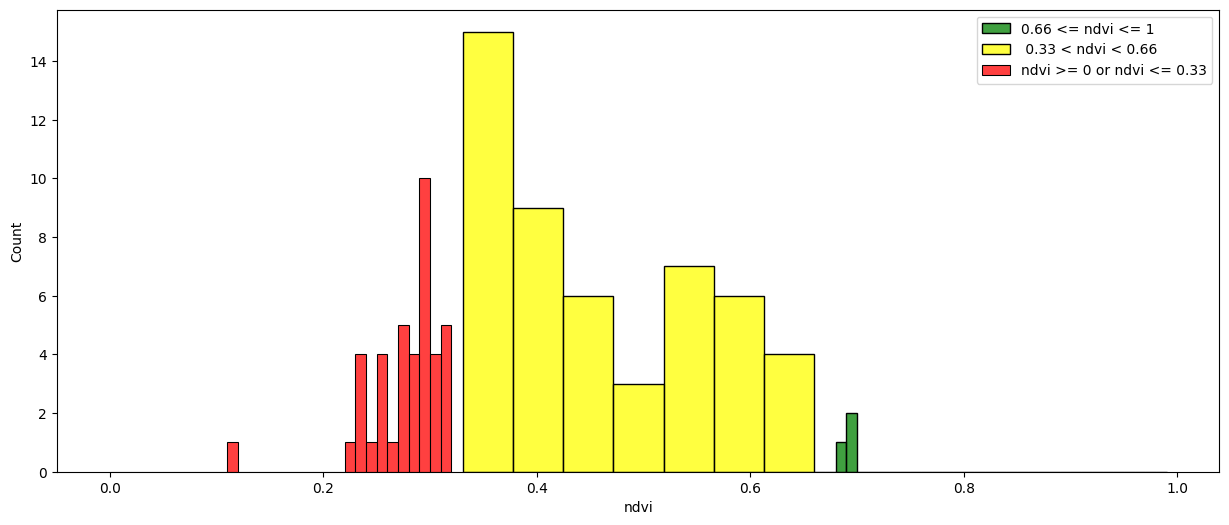

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(x='ndvi', data=df[(df['ndvi'] <= 1) & (df['ndvi'] >= 0.66)], color='green', label='0.66 <= ndvi <= 1',bins=np.arange(0.66,1, 0.01))
sns.histplot(x='ndvi', data=df[((df['ndvi'] > 0.33) & (df['ndvi'] < 0.66))], color='yellow', label=' 0.33 < ndvi < 0.66')
sns.histplot(x='ndvi', data=df[(df['ndvi'] >= 0) | (df['ndvi'] <= 0.33)], color='red', label='ndvi >= 0 or ndvi <= 0.33',bins=np.arange(0,0.33, 0.01))
ax.set_xlabel('ndvi')
ax.set_ylabel('Count')
ax.legend()
plt.show()

From the above analysis we infer that.


1.  In all these years, most of the crop lies in the unhealthy region.
2.   We can also see significant amount of crops that are in he region of Moderately healthy.
3.   The crops lying in the healthy region are signicantly less as these crops dont grow over the entire year, there are specific months which has higher NDVI index






NDVI analysis can direct you on where to investigate further or do broader damage assessment if you already know which factors are influencing plant health.

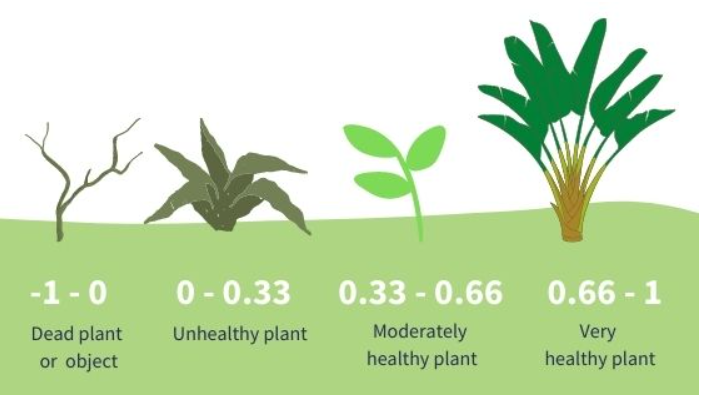

In [ ]:
df0=df.filter(['ndvi'])

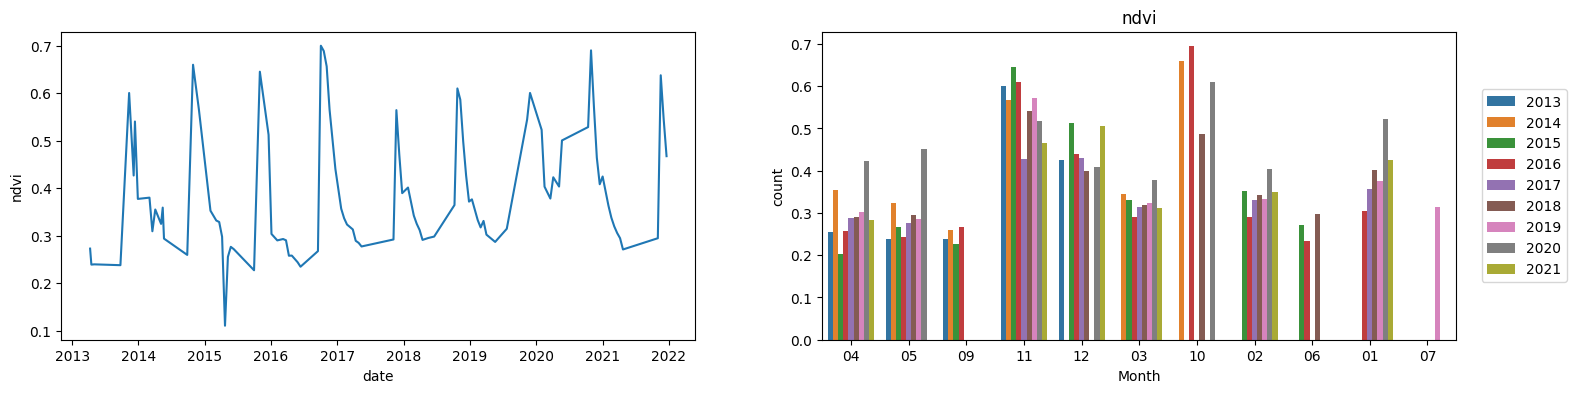

In [ ]:
df3 = pd.DataFrame()
for i in df0.columns:
    r_mean_daily_max = df.groupby(['Year', 'Month','Day'], as_index=False)[i].max()
    mda8 = r_mean_daily_max.groupby(['Year', 'Month'], as_index=False)[i].median()
    fig,ax=plt.subplots(1,2,figsize=(18,4))
    sns.lineplot(data=df0[i],ax=ax[0])
    sns.barplot(x='Month', y=i, data=mda8, hue='Year',ax=ax[1])
    df3[i]=r_mean_daily_max.groupby(['Year', 'Month'], as_index=True)[i].median()
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.title(i)
    plt.ylabel('count')
    plt.show()

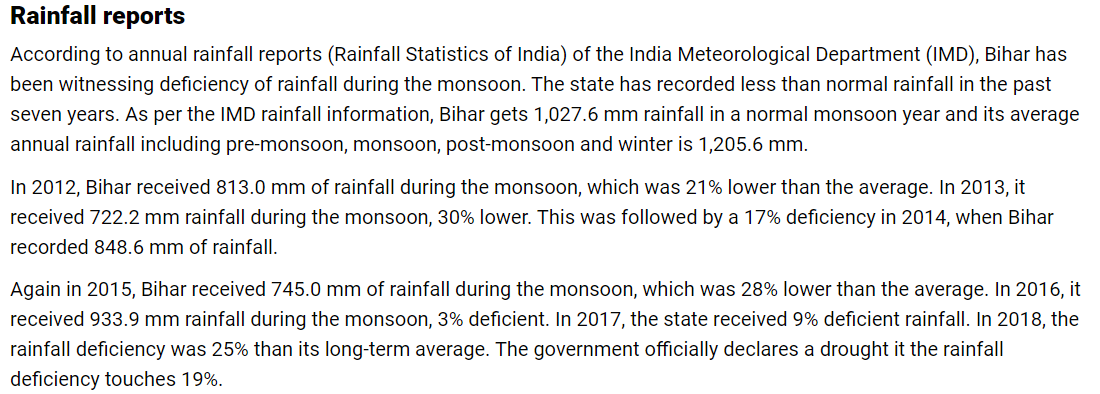

From the above plots we can get the following assumptions.

1.  The autumn harvest in 2018 was poor in India’s eastern province of Bihar as according to the sources rainfall was deficient by 25% of its long term average during the southwest monsoon.
2.   We can see a significant increase in NDVI values in the month of **October** and **November**, as this the peak time of the winter crops and after this the crops are harvested. 






In [ ]:
fig = px.violin(df, y="ndvi", box=True,
                points='all')
fig.show()

Assumptions that can be made from the above plot
1.   Most of the NDVI is ranging from **0.27-0.359**, depicting the moderately healthy plants.
2.   The max value of NDVI is 0.699 and min value is 0.11.



#**Data Visualisation and Analysis on Monthly Interpolated Data**

In [ ]:
df1 = pd.read_csv("/content/KatoriaMonthly.csv",parse_dates=True)
df1["date"] = pd.to_datetime(df1["date"], errors='coerce')
df1['Year'] = pd.to_datetime(df1['date']).dt.strftime('%Y')
df1['Month'] = pd.to_datetime(df1['date']).dt.strftime('%m')
df1['Day'] = pd.to_datetime(df1['date']).dt.strftime('%d')
df1=df1.set_index("date")
df1

,ndvi,Year,Month,Day
date,,,,
2013-04-30,0.255805,2013,04,30
2013-05-31,0.239520,2013,05,31
2013-06-30,0.239084,2013,06,30
2013-07-31,0.238633,2013,07,31
2013-08-31,0.238183,2013,08,31
...,...,...,...,...
2021-08-31,0.388089,2021,08,31
2021-09-30,0.413793,2021,09,30
2021-10-31,0.440354,2021,10,31


In [ ]:
df.describe()

,ndvi
count,97.000000
mean,0.386734
std,0.129980
min,0.110298
25%,0.292840
50%,0.337790
75%,0.467249
max,0.699797


**NDVI variation with year (Monthly Interpolated Data)**

In [ ]:
fig = px.box(df1, x = "Year", y="ndvi", color = 'Year')
fig.show()

Assumption that can made from the above graph
1.   In the interpolated monthly data we can see **different changes** as compared to our raw data.
2.   The NDVI index is **highest** in the year 2016 and has the outliers.
3.   In the monthly interpolated data the outliers of 2015 have been removed.






In [ ]:
fig = px.box(df1, x = "Month", y="ndvi", color = 'Month')
fig.show()

From the above plot we can infer that the 
1.   The NDVI index from **January-April** is **low** because most of the crops have been harvested.
2.   The NDVI index in **summer months** are good as its the peak time when crops like wheat, rice and barley are grown.
3.   The interpolated data shows significant changes as compared to EDA of raw data.
4.   The October month doesn't show much changes in interpolated data






**Crop Health (Monthly Interpolated Data)**

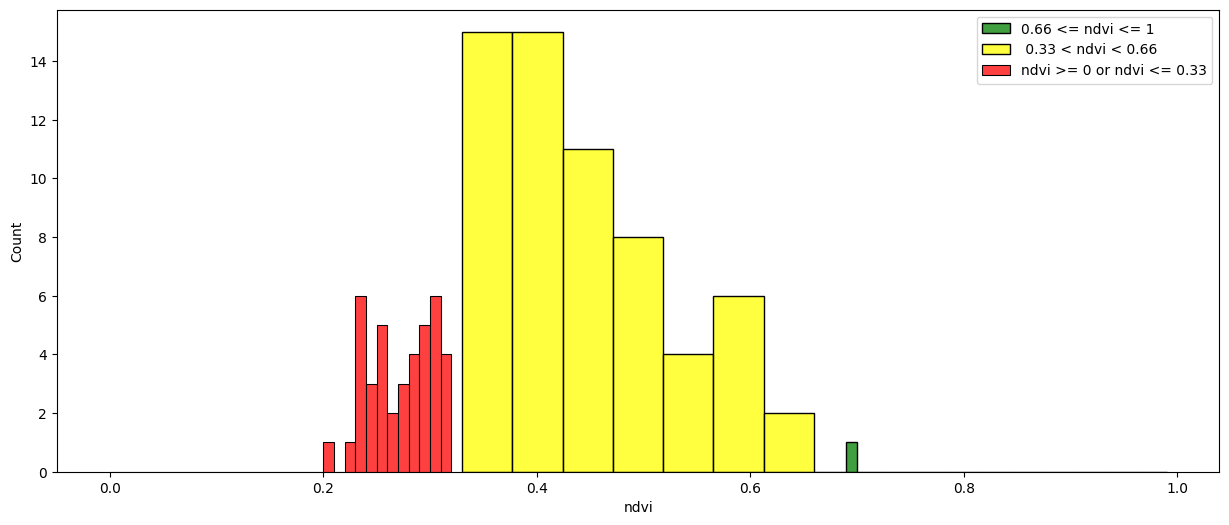

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(x='ndvi', data=df1[(df1['ndvi'] <= 1) & (df1['ndvi'] >= 0.66)], color='green', label='0.66 <= ndvi <= 1',bins=np.arange(0.66,1, 0.01))
sns.histplot(x='ndvi', data=df1[((df1['ndvi'] > 0.33) & (df1['ndvi'] < 0.66))], color='yellow', label=' 0.33 < ndvi < 0.66')
sns.histplot(x='ndvi', data=df1[(df1['ndvi'] >= 0) | (df1['ndvi'] <= 0.33)], color='red', label='ndvi >= 0 or ndvi <= 0.33',bins=np.arange(0,0.33, 0.01))
ax.set_xlabel('ndvi')
ax.set_ylabel('Count')
ax.legend()
plt.show()

From the above analysis we infer that.
1.   There is only one point in the monthly interpolated data which shows the most healthy plants, the reason could be due the statistical interpolation which is sequeezing the data to monthly




**Agricultural harvest in Katoria**
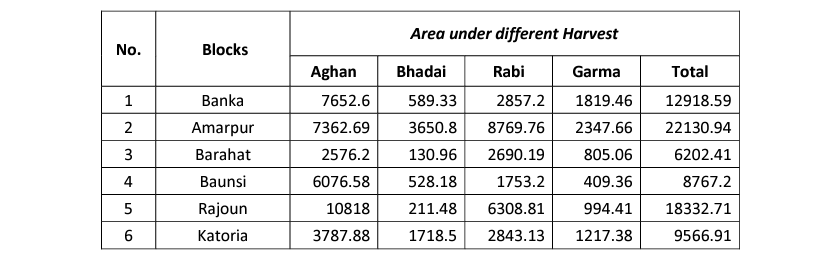

According to the above table was recorded in 2017 we can see the "Area under different harvest" showing a good total amount in the Katoria region being a controversial land.

In [ ]:
df00=df1.filter(['ndvi'])

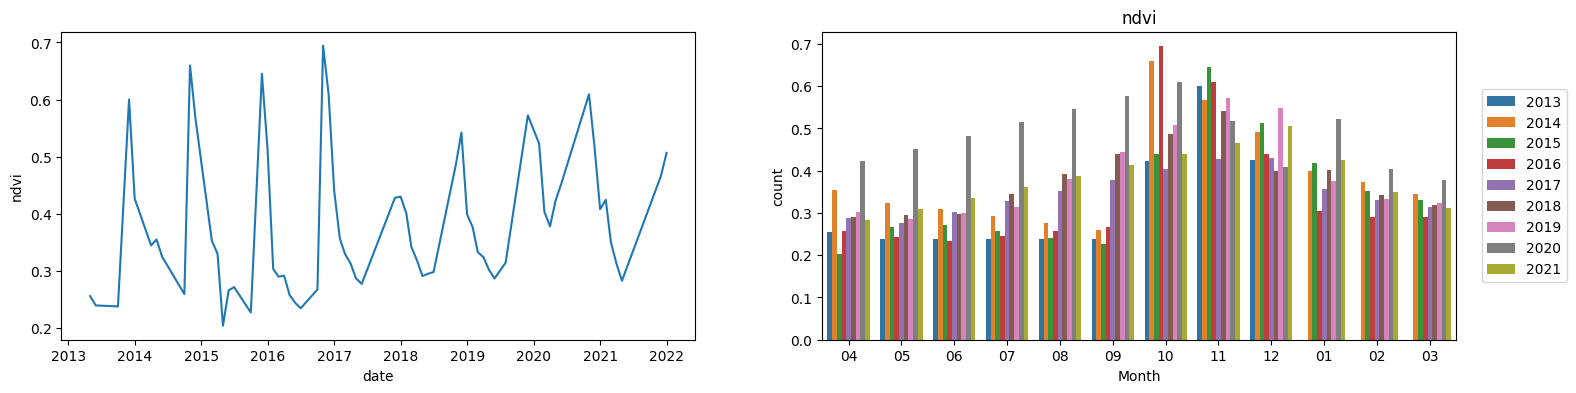

In [ ]:
df4 = pd.DataFrame()
for i in df00.columns:
    r_mean_daily_max = df1.groupby(['Year', 'Month','Day'], as_index=False)[i].max()
    mda8 = r_mean_daily_max.groupby(['Year', 'Month'], as_index=False)[i].median()
    fig,ax=plt.subplots(1,2,figsize=(18,4))
    sns.lineplot(data=df00[i],ax=ax[0])
    sns.barplot(x='Month', y=i, data=mda8, hue='Year',ax=ax[1])
    df4[i]=r_mean_daily_max.groupby(['Year', 'Month'], as_index=True)[i].median()
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.title(i)
    plt.ylabel('count')
    plt.show()

According the above plots we can infer that.

1.   We can still see the decrease of NDVI in the year 2015
2.   The lineplot shows more generalised seasonal trends as per the raw data.
3.   Post Covid years show increase in the values of NDVI.



In [ ]:
fig = px.violin(df1, y="ndvi", box=True,
                points='all')
fig.show()

According to the above visualisation we can see that the interpolated data, most of the data lies between **0.27-0.33**, depicting most of the crops are moderately healthy over the period of time.

# **Seasonal phase of crop and final month-wise analysis**

Seasonal crop phase
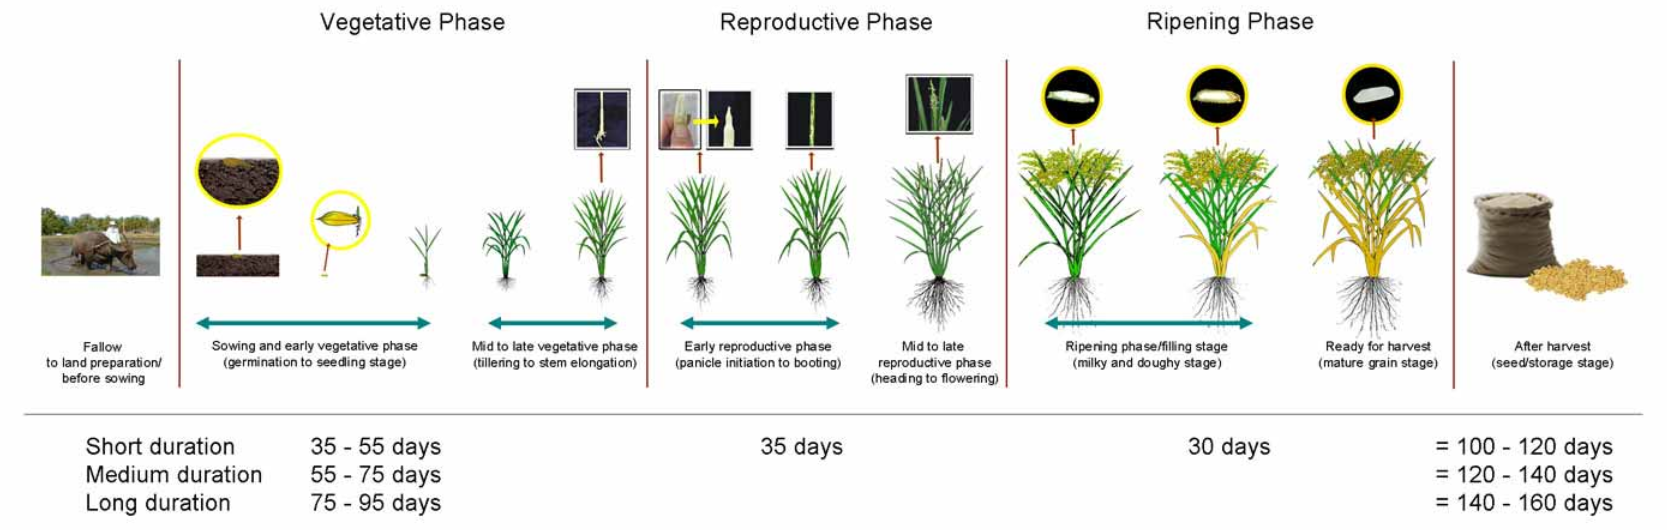



1.   **May:** This is the time for land preparation, such as plowing, harrowing, leveling, and bunding.
2.   **June:** Rice seeds are sown during this month. Farmers usually start with early-maturing varieties in lowland areas and then move on to the main crop.
3.   **July:** This month is critical for the growth of rice plants, as it is the time when monsoon rains arrive in most parts of India. Farmers need to ensure that the fields are adequately flooded and the young plants are not submerged.
4.   **August:** The rice plants start to tiller (produce side shoots) during this month, which helps to increase the number of panicles (flower clusters) and eventually the number of grains per panicle.
5.   **September:** This is the month when the rice plants start to flower. Farmers need to be vigilant to prevent damage from pests and diseases.
6.   **October:** The rice plants start to form grains during this month. Farmers need to ensure that the fields are kept flooded and that there is enough sunlight for the grains to mature.
7.   **November:** This is the month when the rice plants start to mature, and the grains start to turn yellow. Farmers need to monitor the fields and start preparing for harvest.
8.   **December:** This is the time for harvesting the rice crop. Farmers usually harvest the crop manually or with the help of machines. Once the rice is harvested, it is dried, threshed, and stored for later use.
9.   **January:** After the harvest, farmers usually prepare the fields for the next crop by plowing, harrowing, and applying fertilizers.








# **Seasonal Decompostion**

The decomposition process involves separating the time series data into three components:

*   **Trend:** the long-term pattern or direction of the time series.
*   **Seasonality:** the repetitive and periodic patterns of the time series that occur at fixed intervals, such as daily, weekly, or yearly.
*   **Residuals:** the remaining variation in the time series after removing the trend, seasonality, and cycle components.






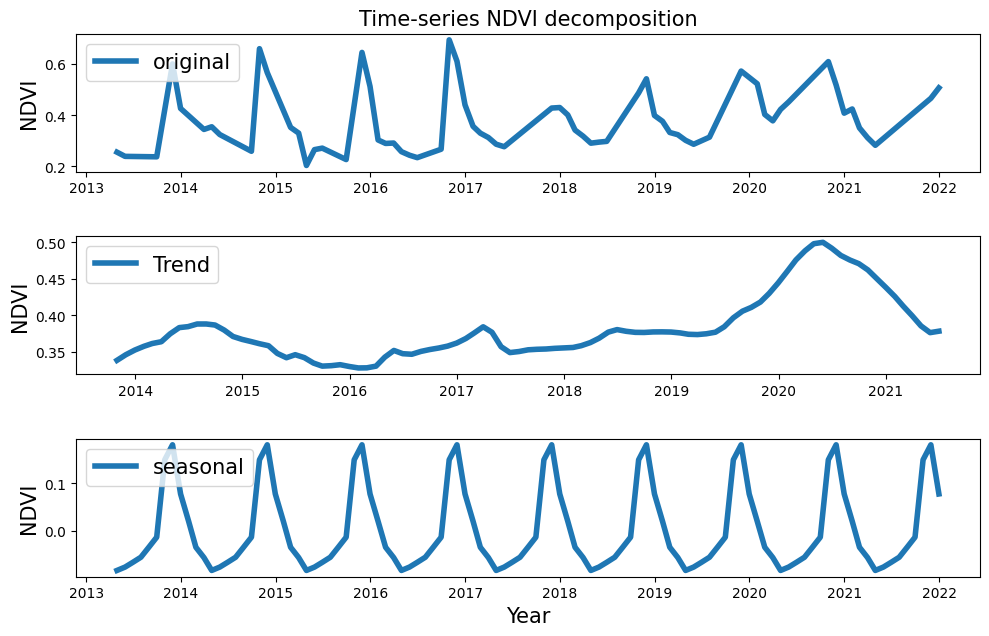

In [ ]:

# Perform decomposition on monthly data
decomposition = seasonal_decompose(ndvi_df_monthly, model='additive', period=12)

# Assign trend, seasonal components from decomposed data
trend = decomposition.trend
seasonal = decomposition.seasonal

# Plot the original data, the trend, the seasonality, and the residual
plt.figure(figsize=(10,8))
plt.subplot(411)
plt.plot(ndvi_df_monthly, label='original', linewidth=4)
plt.legend(loc='best', fontsize=15)
plt.ylabel('NDVI', fontsize=15)
plt.title('Time-series NDVI decomposition', fontsize=15)
plt.subplot(412)
plt.plot(trend, label='Trend', linewidth=4)
plt.legend(loc='best', fontsize=15)
plt.ylabel('NDVI', fontsize=15)
plt.subplot(413)
plt.plot(seasonal, label='seasonal', linewidth=4)
plt.legend(loc='best', fontsize=15)
plt.ylabel('NDVI', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.tight_layout()



*   The NDVI is showing increase after the year 2018 till 2021
*   Seasonality is constant over time but follows strictly cyclic manner. That is every year there are specific
times when NDVI rises and falls



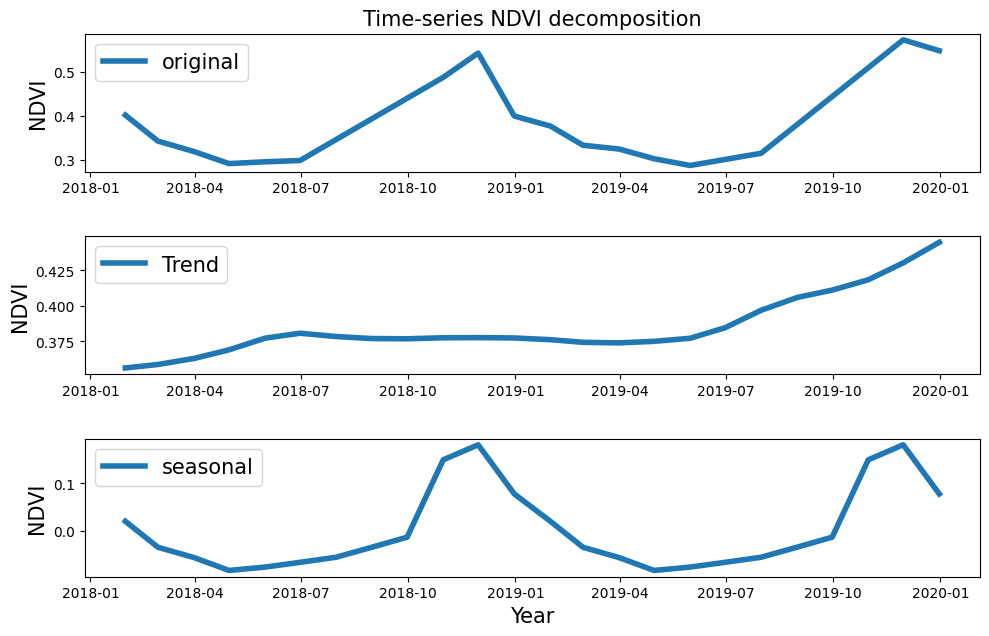

In [ ]:
#Plotting the original data, the trend, the seasonality data over two years
two_year = (ndvi_df_monthly.index>='2018-01-01') & (ndvi_df_monthly.index<='2020-01-01')
plt.figure(figsize=(10,8))
plt.subplot(411)
plt.plot(ndvi_df_monthly[two_year], label = 'original', linewidth=4)
plt.legend(loc = 'best', fontsize=15)
plt.ylabel('NDVI', fontsize=15)
plt.title('Time-series NDVI decomposition', fontsize=15)
plt.subplot(412)
plt.plot(trend[two_year], label = 'Trend', linewidth=4)
plt.legend(loc = 'best', fontsize=15)
plt.ylabel('NDVI', fontsize=15)
plt.subplot(413)
plt.plot(seasonal[two_year], label = 'seasonal', linewidth=4)
plt.legend(loc = 'best', fontsize=15)
plt.ylabel('NDVI', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.tight_layout()


*   Looking into the seasonality, **NDVI hits lowest** over **fall and winter season** whereas it hits **highests** during the **summer season**. This is expected given the geographical context of Eastern India



# **NDVI Prediction Modelling**

### FBProphet Modelling

Classic forecasting models such as ARIMA needs lots of parameter tuning and expert knowledge in statistics and analytics. Facebook developed a open source library called FBProphet, which requires very little domain knowlegde and easy to integrate in automated production environment. FBProphet decomposes any time series data into trend, seasonality, event or holidays components and can be written as:

Y(t) = T(t) + S(t) + H(t) + $\epsilon$

T(t): piecewise linear or logistic growth curve for modelling trend components
S(t): cyclic changes in the time-series (dily/weekly/monthly/quarterly)
H(t): effect of holidays or unscheduled events
$\epsilon$: noisy term that can not be modelled with equation

As opposed to time based dependance, FBProphet considers forecasting as curve fitting problem. 

In this section, FBProphet will be used to model Katoria Village NDVI prediction. Modelling will be confined to a base model, but it could be expanded by integrating powerful tools FBProphet offers such as considering saturating growth, trend change and special events effect.

In [ ]:
## Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
import warnings
from prophet import Prophet
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

We are creating a Prophet model for this forecasting, We will upsample the date column to daily frequency by interpolating it on daily basis to increase the size of data to get more accurate predictions, and the NDVI values have been linearly interpolated to fill in any missing values.

In [ ]:
# Up-sampple the date column
ndvi_df_daily = ndvi_df.resample('D').mean()
ndvi_df_daily.interpolate(method='polynomial', order = 1, inplace = True)
ndvi_df_daily

,ndvi
2013-04-10,0.272651
2013-04-11,0.267838
2013-04-12,0.263025
2013-04-13,0.258211
2013-04-14,0.253398
...,...
2021-12-15,0.486985
2021-12-16,0.482051
2021-12-17,0.477117
2021-12-18,0.472183


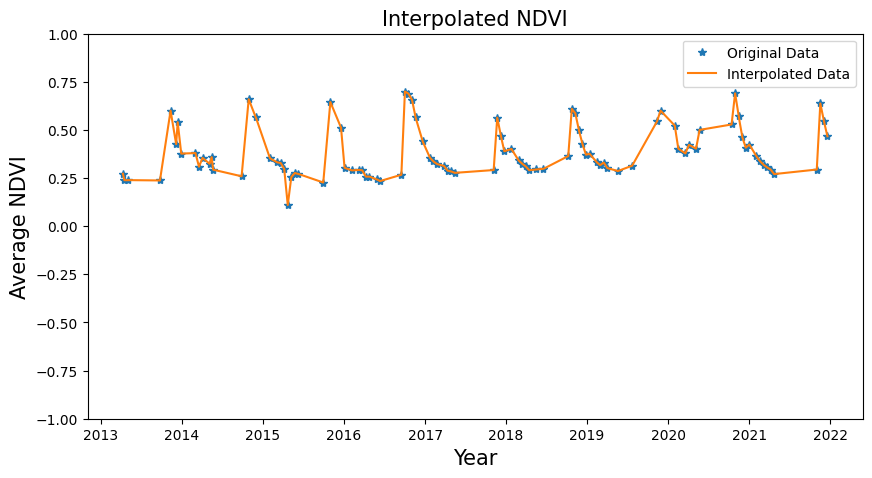

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(ndvi_df, '*')
plt.plot(ndvi_df_daily)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average NDVI', fontsize=15)
plt.legend(['Original Data', 'Interpolated Data'])
plt.title("Interpolated NDVI", fontsize=15)
plt.ylim([-1, 1])
plt.show()

The training data contains all the NDVI values from the beginning of the time series up to the cutoff date, while the testing data contains all the NDVI values from the cutoff date to the end of the time series.
The plot shows the NDVI values over time, with the training data in green and the testing data in blue. The y-axis ranges from -1 to 1, and the x-axis shows the years. The plot demonstrates how the data has been split into training and testing sets based on the cutoff date of 2020-01-01.

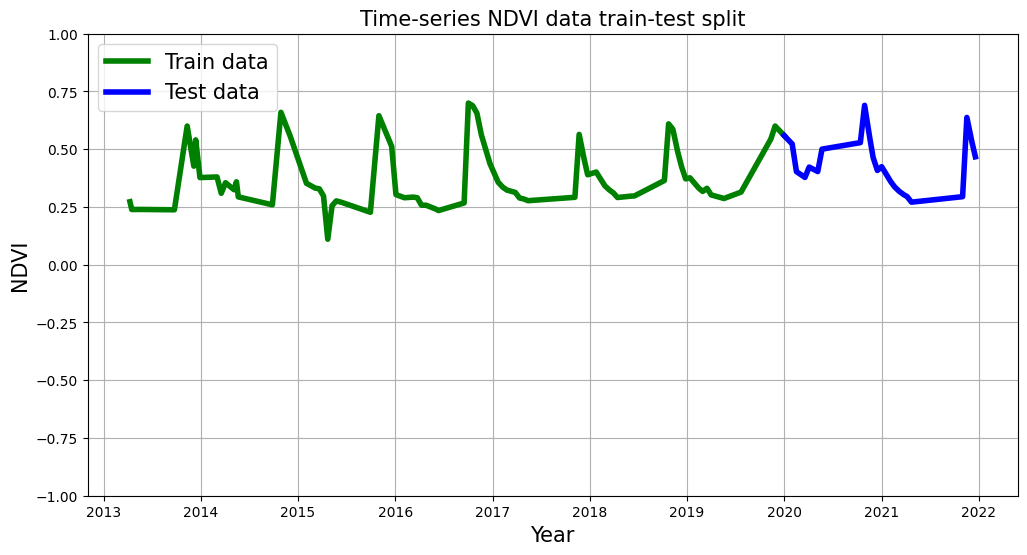

In [ ]:
# split data into train and training set
 
train_data, test_data = ndvi_df_daily[ndvi_df_daily.index <= '2020-01-01'],\
                        ndvi_df_daily[ndvi_df_daily.index >= '2020-01-01']


# plot the training and testing data

plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year', fontsize=15)
plt.ylabel('NDVI', fontsize=15)
plt.plot(train_data, 'green', label='Train data', linewidth=4)
plt.plot(test_data, 'blue', label='Test data', linewidth=4)
plt.title('Time-series NDVI data train-test split', fontsize=15)
plt.ylim([-1,1])
plt.legend(fontsize=15)
plt.show()

Rename the NDVI dataframe colums to 'ds' and 'y' to be compatible with FBProphet model

In [ ]:
# rearrange data to suit Prophet model

# rename columns from date and close to ds and y

train_data_fb = train_data.reset_index()
train_data_fb.rename(columns={"index": "ds", "ndvi": "y"},inplace=True)
train_data_fb.head()

,ds,y
0,2013-04-10,0.272651
1,2013-04-11,0.267838
2,2013-04-12,0.263025
3,2013-04-13,0.258211
4,2013-04-14,0.253398


In [ ]:
# Build the model
m1=Prophet(interval_width=0.95, daily_seasonality=False,
           changepoint_range=0.7,                                                  
           changepoint_prior_scale=0.3)
                                          
m1.fit(train_data_fb)
# number of days to forecast, based on test_data
forecast_days = (test_data.index[-1]-test_data.index[0]).days
# Create dataframe with the dates we want to predict
future = m1.make_future_dataframe(periods = forecast_days, freq = 'D')
# Predict
forecast = m1.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfs8a2gmz/ktp9scpn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfs8a2gmz/wn90h2nc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21115', 'data', 'file=/tmp/tmpfs8a2gmz/ktp9scpn.json', 'init=/tmp/tmpfs8a2gmz/wn90h2nc.json', 'output', 'file=/tmp/tmpfs8a2gmz/prophet_modelv_5swl0g/prophet_model-20230415122111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1200x500 with 0 Axes>

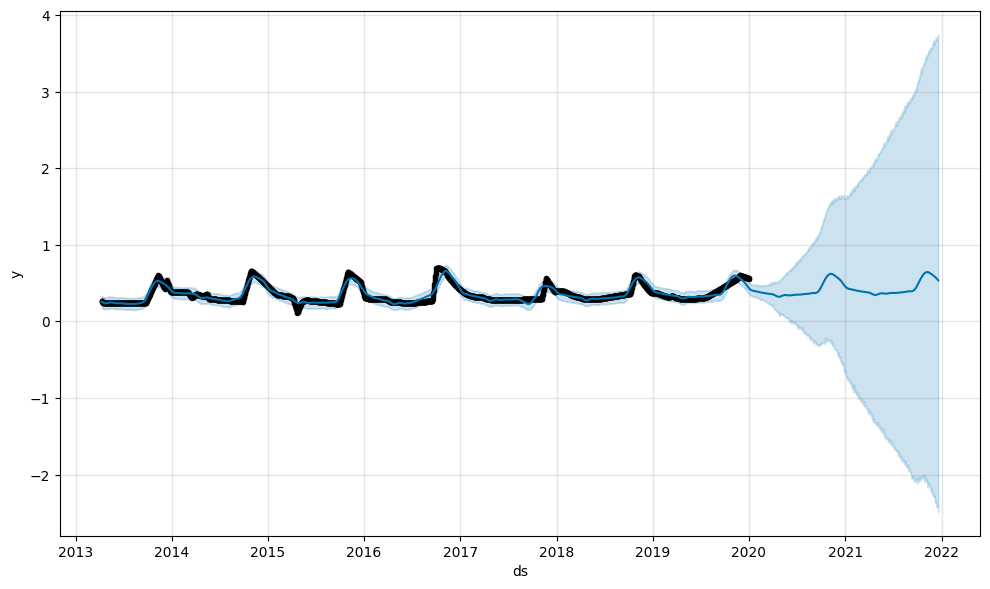

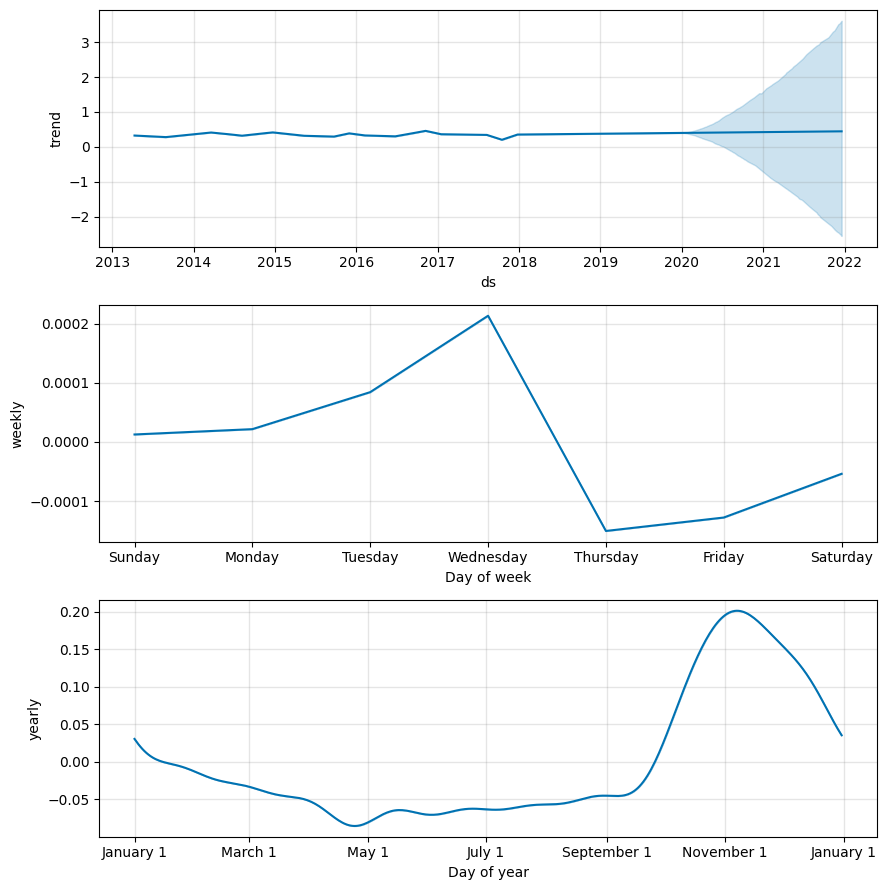

In [ ]:
# plot the forecast 
plt.figure(figsize=(12,5), dpi=100)
fig = m1.plot(forecast)
fig = m1.plot_components(forecast)
plt.grid(True)
plt.show()

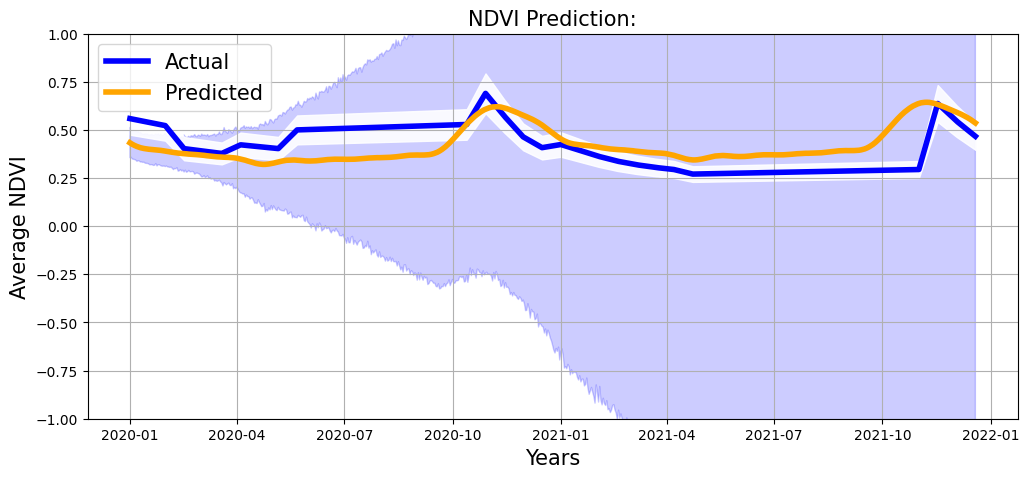

In [ ]:
# plot only the train, test and forecast data for 2020-2022
fc_test = forecast[forecast.ds.isin(test_data.index)]
# take forecast data for 2020-2022
plt.figure(figsize=(12,5), dpi=100)
ax=plt.plot(test_data, color = 'blue', label='Actual', linewidth=4)
plt.plot(fc_test.ds,fc_test.yhat, color = 'orange',label='Predicted', linewidth=4)
plt.fill_between(fc_test.ds, fc_test.yhat_lower.values, fc_test.yhat_upper.values, 
                 color='blue', alpha=.2)
plt.title('NDVI Prediction:', fontsize=15)
plt.grid(True)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Average NDVI', fontsize=15)
plt.ylim((-1,1))
plt.legend(loc='upper left', fontsize=15)
plt.fill_between(fc_test.ds,.85*test_data.ndvi,1.15*test_data.ndvi,
                 color='white', alpha=.90)
    
# save the plot
plt.show()


*   The simple FBProphet has captured a descent seasonality pattern
*   **Actual NDVI data is infrequent whereas model trains on the basis of daily observation. More frequent training data is expected to improve the prediction**





**Model Performance**

Model performance is evaluated by comparing predicted values with test data. Comaprison will be made in terms of Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE). Average of these metrics will be taken and named 'average_score' to get a sense of overall fit of the prediction with test data.

In [ ]:
# function to report back the performance metrics of a function
def performance_measure(model, yhat, y):
    # mean squared error
    mse = mean_squared_error(y, yhat)
    #mean absolute error
    mae = mean_absolute_error(y, yhat)
    # root mean squared error
    rmse=np.sqrt(mse)
    #average score
    average=np.mean((mse, mae, rmse))
    # save model performance as dataframe
    metrics=pd.DataFrame({'model': model, 'mse': [mse], 'mae': [mae], 'rmse': [rmse], 'average_score':[average]})
    return metrics

In [ ]:
# performance measures for the FBProphet model
FBProphet = performance_measure('FBProphet', fc_test.yhat.values.flatten(), test_data.values.flatten())
FBProphet

,model,mse,mae,rmse,average_score
0,FBProphet,0.013775,0.100347,0.117366,0.077162


# **Conclusion**

**Summary**

- Katoria Village's average NDVI values were extracted for 2013-2020 and predicted were made for the duration of 2020-present date
- Landsat 8 imageries were collected for the Katoira region with maximum cloud coverage of 20%
- For the time-series NDVI analysis, Google Earth Engine was used through Python API
- For the time-series NDVI prediction, FBProphet libraries were used
- Model was trained for capturing major trend chage points for best curve fitting and prediction
- Average_score for the trained FBProphet model is **0.077162**

**Areas to Explore**

- Apply cloud removal algorithms to get more frequent training data
- Apply classification algorithm to create vegetation only mask to more accurately calculate NDVI 
- Look for satellite imagery with shortest revisit time to increase training data volume
- Identy special events that triggered change in NDVI data such as natural disaster, drought or forest fire. This can be included in FBProphet model for much more robust prediction 
- Error in prediction can be identified and add as a regressor for FBProphet prediction

# **References**



*   [Impact of Flowers on NDVI values](https://www.researchgate.net/publication/236683287_Yellow_flowers_can_decrease_NDVI_and_EVI_values_Evidence_from_a_field_experiment_in_an_alpine_meadow)
*   [NDVI](https://up42.com/blog/5-things-to-know-about-ndvi)
*   [SOIL DISTRIBUTION & AGRICULTURAL PATTERN IN BANKA DISTRICT, BIHAR](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.jetir.org/papers/JETIR2011352.pdf)
*   [Sucess Stories Banka](https://banka.kvk4.in/success-stories.php)
*   [FBProphet](https://facebook.github.io/prophet/docs/quick_start.html#python-api)
*   [Turning wasteland into green land, the Banka way
](https://indianexpress.com/article/india/turning-wasteland-into-green-land-the-banka-way-6373987/)
*   [Crop Calendar]()
*   [INDIA: DECLINING RAINFALL PLACES FARMING AT RISK IN BIHAR](https://www.preventionweb.net/news/india-declining-rainfall-places-farming-risk-bihar)












